In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
class PCA():
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        self.mean = X.mean(axis=0)
        X = X - self.mean

        cov = np.cov(X.T)
        eigen_values, eigen_vectors = np.linalg.eig(cov)
        eigen_vectors = eigen_vectors.T

        idxs = np.argsort(eigen_values)[::-1]
        eigen_vectors = eigen_vectors[idxs]
        self.components = eigen_vectors[0: self.n_components]

    def transform(self, X):
        return np.dot(X - self.mean, self.components.T)

In [3]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [4]:
X.shape, y.shape

((150, 4), (150,))

In [5]:
pca = PCA(n_components=2)
pca.fit(X)

In [6]:
X_proj = pca.transform(X)
X.shape, X_proj.shape

((150, 4), (150, 2))

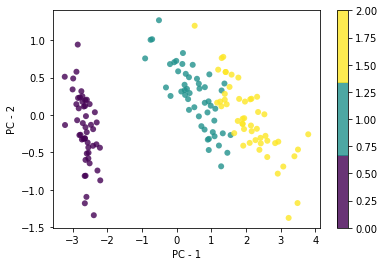

In [7]:
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=y, edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('viridis', 3))
plt.xlabel("PC - 1")
plt.ylabel("PC - 2")
plt.colorbar()
plt.show()